In [3]:
%matplotlib inline

In [4]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.stats as st
import datetime
from pathlib import Path

In [5]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [6]:
#Import URL and API
# url = ""
# weather_api = requests.get(url)
# print(weather_api)


In [7]:
# 1 hour, 6 hour, 24 hour - is there a difference
# Difference between rainy  and snowy day pickups? - Caleb

In [8]:
# How does the relative temperature and humidity affect pickups? - Caleb

In [9]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan

In [10]:
#Does different boroughs? Ryan

In [11]:
# Does the day of the week affect pickups? - Fidel
uber_df['timestamp']= pd.to_datetime(uber_df['pickup_dt'])
uber_df['timestamp'].dt.day_name()
uber_df['day_of_the_week']=uber_df['timestamp'].dt.day_name()
uber_df_2=uber_df[["day_of_the_week", "pickups"]]


print(uber_df_2)



      day_of_the_week  pickups
0            Thursday      152
1            Thursday     1519
2            Thursday        0
3            Thursday     5258
4            Thursday      405
...               ...      ...
29096         Tuesday        0
29097         Tuesday     3828
29098         Tuesday      580
29099         Tuesday        0
29100         Tuesday        3

[29101 rows x 2 columns]


In [12]:
# Extract individual days
group0 = uber_df_2[uber_df_2["day_of_the_week"] == 'Friday']["pickups"]
group1 = uber_df_2[uber_df_2["day_of_the_week"] == 'Monday']["pickups"]
group2 = uber_df_2[uber_df_2["day_of_the_week"] == 'Saturday']["pickups"]
group3 = uber_df_2[uber_df_2["day_of_the_week"] == 'Sunday']["pickups"]
group4 = uber_df_2[uber_df_2["day_of_the_week"] == 'Thursday']["pickups"]
group5= uber_df_2[uber_df_2["day_of_the_week"] == 'Tuesday']["pickups"]
group6= uber_df_2[uber_df_2["day_of_the_week"] == 'Wednesday']["pickups"]


In [13]:
# Perform the ANOVA
st.f_oneway(group0, group1, group2, group3, group4,group5,group6)

F_onewayResult(statistic=12.766621162505526, pvalue=1.880511996714594e-14)

In [14]:
#create a new data frame to show total pickups_per_day
pick_up_totals=uber_df.groupby("day_of_the_week")["pickups"].sum()
pick_up_totals


day_of_the_week
Friday       2261480
Monday       1698122
Saturday     2410063
Sunday       2004315
Thursday     2140072
Tuesday      1864578
Wednesday    1887143
Name: pickups, dtype: int64

In [15]:
# Labels for the sections of our pie chart
labels = ["Friday", "Monday", "Saturday", "Sunday", "Thursday","Tuesday","Wednesday"]

# The values of each section of the pie chart
sizes = [2261480, 1698122,2410063, 2004315,2140072,1864578,1887143]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple", "blue", "yellow","green", "pink"]



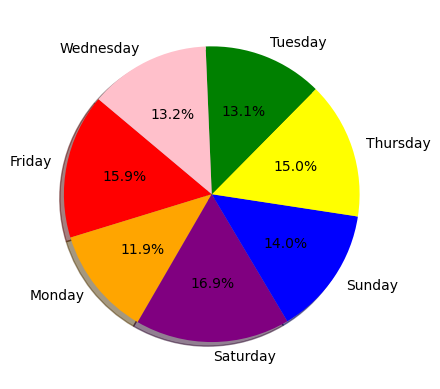

In [16]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [17]:
#creating variables for the barchart
pickup_by_day=uber_df.groupby(["day_of_the_week"])["pickups"].mean()
pick_by_days= pickup_by_day.sort_values(ascending= True)

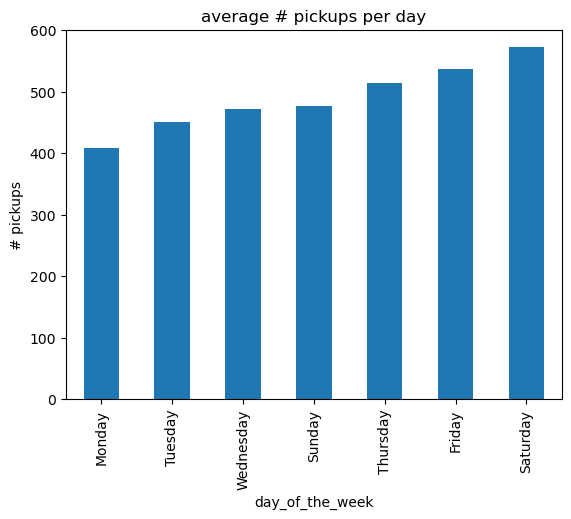

<Figure size 640x480 with 0 Axes>

In [18]:
#Bar graph to show the average pickups occured per day
pick_up_days_chart= pick_by_days.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_days_chart.set_xlabel("day_of_the_week")
pick_up_days_chart.set_ylabel("# pickups")

#add title to chart
plt.title('average # pickups per day')

plt.show()
plt.tight_layout()

In [19]:
#Do people get more ubers on the Weekday vs Weekend
uber_df['timestamp']= pd.to_datetime(uber_df['pickup_dt'])
uber_df['timestamp'].dt.dayofweek
uber_df['weekday'] = uber_df['timestamp'].dt.day_of_week
uber_df['day_type'] = uber_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
trip_by_week= uber_df[["day_type", "pickups"]]
print(trip_by_week)


      day_type  pickups
0      Weekday      152
1      Weekday     1519
2      Weekday        0
3      Weekday     5258
4      Weekday      405
...        ...      ...
29096  Weekday        0
29097  Weekday     3828
29098  Weekday      580
29099  Weekday        0
29100  Weekday        3

[29101 rows x 2 columns]


In [21]:
# Extract individual days
group0 = trip_by_week[trip_by_week["day_type"] == 'Weekday']["pickups"]
group1 = trip_by_week[trip_by_week["day_type"] == 'Weekend']["pickups"]

In [22]:
# Perform the ANOVA
st.f_oneway(group0, group1)

F_onewayResult(statistic=14.014507957897177, pvalue=0.00018175457982768056)

In [ ]:
#creating variables for the barchart
pickup_week=trip_by_week.groupby(["day_type"])["pickups"].mean()
pick_by_week= pickup_week.sort_values(ascending= True)

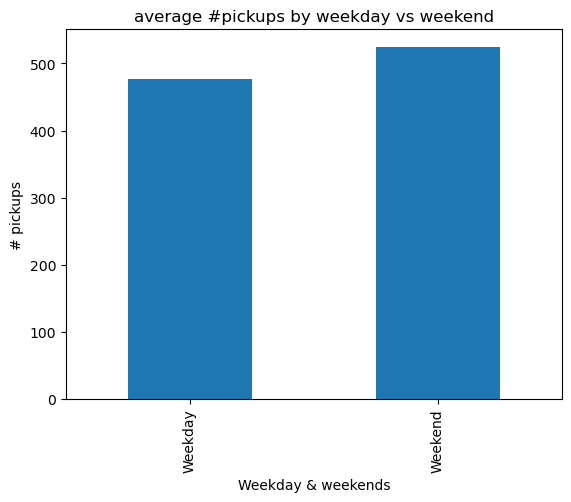

<Figure size 640x480 with 0 Axes>

In [ ]:
#Bar graph to show the average pickups occured per day
pick_up_week_chart= pick_by_week.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_week_chart.set_xlabel("Weekday & weekends")
pick_up_week_chart.set_ylabel("# pickups")

#add title to chart
plt.title('average #pickups by weekday vs weekend')

plt.show()
plt.tight_layout()

In [ ]:
# Correlation and Regression

## Analysis